## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as r



In [2]:
def studentReg(ages_tr, nw_tr):
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(ages_tr, nw_tr)
    return reg


In [3]:
#building our own dataset

np.random.seed(42)
#seed function to generate same random numbers again and again

ages = []

for i in range(100):
    ages.append(r.randint(18,75))
#generating random ages between 18 and 75

net_worths = [i * 6.25 + np.random.normal(scale=40)for i in ages]
#getting slope for the corresponding random ages

ages = np.reshape(np.array(ages),(len(ages),1))
net_worths = np.reshape(np.array(net_worths),(len(net_worths),1))

In [4]:
#splitting DATASET into training and testing data sets
from sklearn.model_selection import train_test_split

ages_train , ages_test , net_worth_train , net_worth_test = train_test_split(ages , net_worths)

reg1 = studentReg(ages_train , net_worth_train)

print("coefficient: ", reg1.coef_)#coefficient of x intercept i.e. slope
print("intercept: ", reg1.intercept_)#intercept




#r square is score  

#if it is closer to 0 model is bad
#if it is closer to 1 model is good
print("Training data", reg1.score(ages_train , net_worth_train))
print("Testing data", reg1.score(ages_test,net_worth_test))

coefficient:  [[6.42462584]]
intercept:  [-13.00977562]
Training data 0.9225689185873422
Testing data 0.8038975128611326


Text(0.5, 1.0, 'Train Model')

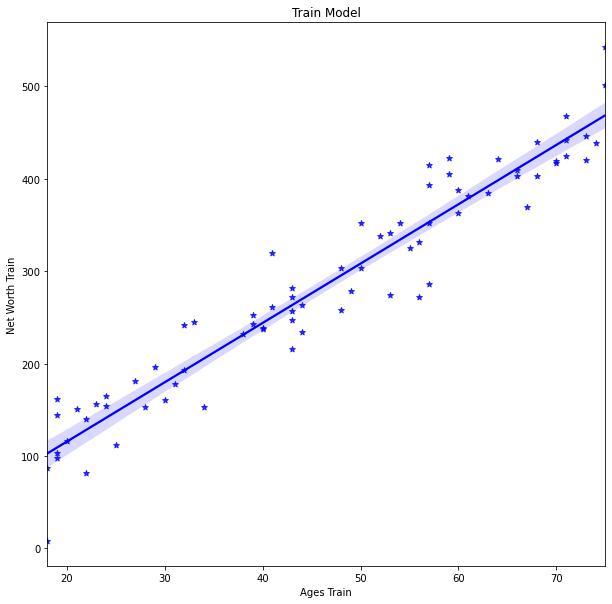

In [5]:
#showig training model on graph
plt.figure(figsize=(10,10))
sns.regplot(x = ages_train , y = net_worth_train, scatter=True , color="b",marker="*")
plt.xlabel("Ages Train")
plt.ylabel("Net Worth Train")
plt.title("Train Model")


Text(0.5, 1.0, 'Test Model')

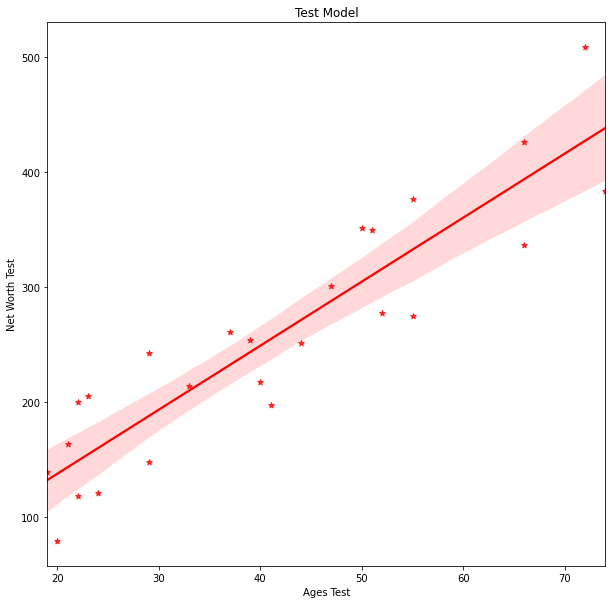

In [6]:
#showing testing model on graph
plt.figure(figsize=(10,10))
sns.regplot(x = ages_test, y = net_worth_test, scatter=True , color="r",marker="*")
plt.xlabel("Ages Test")
plt.ylabel("Net Worth Test")
plt.title("Test Model")

Text(0, 0.5, 'Net Worth')

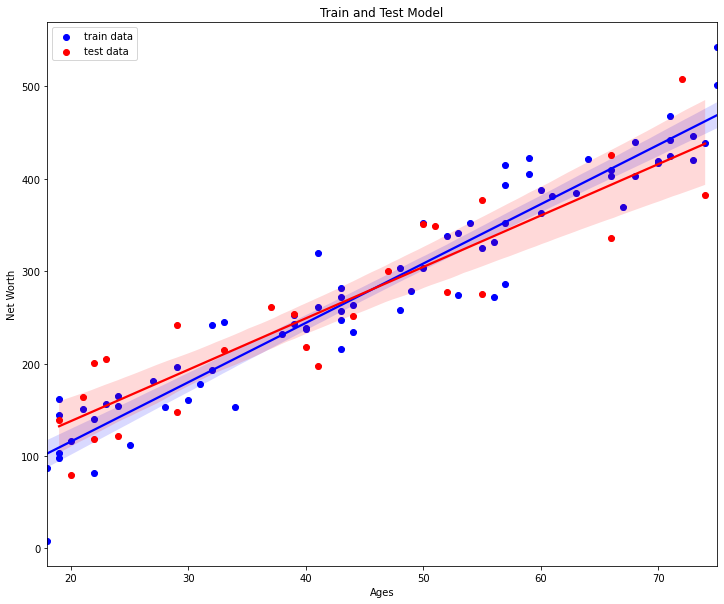

In [7]:
#showing training and testing model on graph
plt.figure(figsize=(12,10))
plt.scatter(ages_train,net_worth_train,color="b",label="train data")
sns.regplot(x = ages_train , y = net_worth_train, scatter=True , color="b",marker="*")
plt.scatter(ages_test,net_worth_test,color="r",label="test data")
plt.legend(loc=2)
plt.title("Train and Test Model")
sns.regplot(x = ages_test , y = net_worth_test, scatter=True , color="r",marker="*")
plt.xlabel("Ages")
plt.ylabel("Net Worth")

#red is testing model
#blue is training model


In [8]:

import pyttsx3
engine = pyttsx3.init()

engine = pyttsx3.init('sapi5')
voices = engine.getProperty('voices')
engine.setProperty('rate', 196)
engine.setProperty('volume', 2.7)
engine.setProperty('voice', voices[1].id)
engine.say('Ok, I am done')
engine.runAndWait()

0.8650160852944355


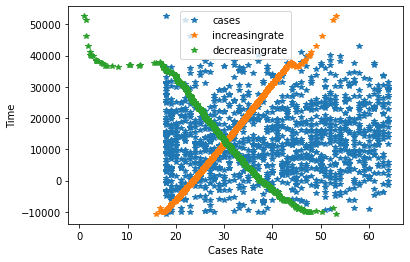

In [10]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#Importing and reading file using pandas
df = pd.read_csv('lrdata.csv')
df.head()

#Using multi linear regression as the values are continuous where x are independent
#values and y : dependent values
y = df['time']
x = df[['cases','increasingrate','decreasingrate']]

#Function named CasesReg for using linear regression model and training the model
#with given values
def CasesReg(x,y):
  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  reg.fit(x,y)
  return reg


#train_test_split is a function in Sklearn model selection for splitting data 
#arrays into two subsets: for training data and for testing data. 
#With this function, you don't need to divide the dataset manually.
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y)

#Passing training data to my Linear regression model
reg = CasesReg(x_train,y_train)

#Using predict to get predicted values of y
y_pred = reg.predict(x_test)
y_pred

#Calculating efficiency. It internally calculates y_pred again and gives the 
#efficiency
print(reg.score(x_test,y_test))


#Plotting graph using matplotlib.
plt.plot(x,reg.predict(x),'*')
plt.legend(labels=['cases','increasingrate','decreasingrate'])
plt.xlabel("Cases Rate")
plt.ylabel("Time")
plt.show()